In [ ]:
# ======================================
# COMP0078 Coursework 2 Q1.7 RE1.2 (SVM)
# Douglas Chiang
# 15055142
# ======================================
cd /content/drive/MyDrive/Colab Notebooks/COMP0078/CW2/Q1

/content/drive/MyDrive/Colab Notebooks/COMP0078/CW2/Q1


In [ ]:
ls

 Assignment_2_Question_1a_v3.ipynb     dtrain123.dat
 Assignment_2_Question_1e_2_v1.ipynb   Plots/
 assignment_2_question_1f_1_v1.py     'Q1 Trial.ipynb'
 assignment_2_question_1f_v1.py        zipcombo.dat
 dtest123.dat


In [ ]:
import time
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
from   sklearn           import svm

In [ ]:
def load_dat(fname, Full_Data = False):
    dat = pd.read_csv(fname, sep='\s+', header=None).to_numpy()
    if Full_Data == False:
        y = dat[:, 0].astype(np.int) - 1  # we are zero-based indexing
    else:
        y = dat[:, 0].astype(np.int)
    
    X = dat[:, 1:].astype(np.float64)
    return X, y

def kFold(data_idx, fold, folds):
    # Return split data indices sets for k-fold validation
    
    if fold > folds - 1:
        raise Exception('fold number exceeds total folds available')
    
    m        = len(data_idx)
    size     = m // folds
    data_validate_idx = data_idx[fold*size:(fold + 1)*size]

    if fold == 0:
        # first fold
        data_train_idx = data_idx[(fold+1)*size:]

    elif fold == folds - 1:
        # last fold
        data_train_idx = data_idx[:fold*size]

    else:
        # middle fold
        data_train1_idx = data_idx[:fold*size]
        data_train2_idx = data_idx[(fold+1)*size:]
        data_train_idx  = np.concatenate((data_train1_idx, data_train2_idx), axis=0)
    
    return data_train_idx, data_validate_idx

In [ ]:
X_dataset, Y_dataset = load_dat("zipcombo.dat", Full_Data = True)
# split_pt = round(X_dataset.shape[0]*0.1)
# X_dataset = X_dataset[:split_pt]
# Y_dataset = Y_dataset[:split_pt]

Run: 1
d = 0.5
fold: 1
**Training: Epoch 1 finished in 4.3449 seconds
fold: 2
**Training: Epoch 1 finished in 4.1872 seconds
fold: 3
**Training: Epoch 1 finished in 4.3474 seconds
fold: 4
**Training: Epoch 1 finished in 4.2606 seconds
fold: 5
**Training: Epoch 1 finished in 4.3074 seconds
d = 1
fold: 1
**Training: Epoch 1 finished in 3.5022 seconds
fold: 2
**Training: Epoch 1 finished in 3.5250 seconds
fold: 3
**Training: Epoch 1 finished in 3.4719 seconds
fold: 4
**Training: Epoch 1 finished in 3.5605 seconds
fold: 5
**Training: Epoch 1 finished in 3.4797 seconds
d = 10
fold: 1
**Training: Epoch 1 finished in 2.9740 seconds
fold: 2
**Training: Epoch 1 finished in 2.9143 seconds
fold: 3
**Training: Epoch 1 finished in 2.9441 seconds
fold: 4
**Training: Epoch 1 finished in 2.9793 seconds
fold: 5
**Training: Epoch 1 finished in 2.9302 seconds
d = 50
fold: 1
**Training: Epoch 1 finished in 2.9757 seconds
fold: 2
**Training: Epoch 1 finished in 2.8758 seconds
fold: 3
**Training: Epoch 1 fi

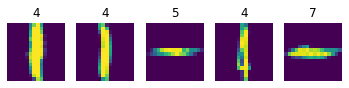

In [ ]:
n_epochs  = 1
#C_All = [5,6,7,8,9,10,11]
C_All = [0.5, 1, 10, 50, 100, 500, 1000]
# Question 1b):
Testing_Error_per_run  = []
d_star_per_run         = []

# Question 1c):
confusion_matrix = []

# Question 1d):
prediction_mistake_count = np.zeros((Y_dataset.shape[0],1))

# Question 1b):
# Loop for 20 runs
for run in range(1,21):
    print("Run: {}".format(run))

    # 8:2 Split training + validation and testing set:
    # Index Shuffle for fitting:
    ran_sample_idx               = np.random.permutation(len(Y_dataset))
    split_pt                     = round(len(ran_sample_idx)*0.8)
    ran_trainvalidate_sample_idx = ran_sample_idx[:split_pt]
    ran_test_sample_idx          = ran_sample_idx[split_pt:len(ran_sample_idx)]
    n_train_validate_samples     = len(ran_trainvalidate_sample_idx)
    n_test_samples               = len(ran_test_sample_idx)
    
    # Loop for d from 1 to 7
    avg_validation_correct = []
    for C_test in C_All:
        print("d = {}".format(C_test))

        # 1b) 5 folds cross validation:
        validation_correct_all = []
        folds = 5
        for fold in range(0, folds):
            print(f"fold: {fold + 1}")

            # Get indicies for training set and validation set:
            data_train_idx, data_validate_idx = kFold(ran_trainvalidate_sample_idx, fold, folds)

            # Data sets:
            X_train              = X_dataset[data_train_idx]
            Y_train              = Y_dataset[data_train_idx]
            X_validate           = X_dataset[data_validate_idx]
            Y_validate           = Y_dataset[data_validate_idx]

            nsamples             = len(data_train_idx)

            # Initialize:
            svm_clf              = svm.SVC(C = C_test, gamma='auto')

            for epoch in range(1, n_epochs + 1):
                tic    = time.time()
                train  = svm_clf.fit(X_train, Y_train)
                toc    = time.time()
                
                print(f"**Training: Epoch {epoch} finished in {toc - tic:0.4f} seconds")
                epoch += 1
            
            # 1b) Validate:
            # ---------------Validation Accuracy-----------------
            validate_correct = 0
            pred             = svm_clf.predict(X_validate)
            validate_correct = sum(Y_validate == pred)
            
            # 1b )Record results:
            validation_correct_all.append(validate_correct)

        # 1b) Save all average validation correct for selection:
        avg_validation_correct.append(np.sum(validation_correct_all)/folds)
    
    # 1b) Select the best d (d*)
    d_star = C_All[np.argmax(avg_validation_correct)]

    # 1b) Retrain using d* on full 80% training set
    print(f"Retrain using C* = {d_star}...")
    X_trainval   = X_dataset[ran_trainvalidate_sample_idx]
    Y_trainval   = Y_dataset[ran_trainvalidate_sample_idx]
    # Initialize:
    svm_clf = svm.SVC(C = d_star, gamma='auto')
    
    for epoch in range(1, n_epochs + 1):
        tic    = time.time()
        train  = svm_clf.fit(X_trainval, Y_trainval) # Full 80%
        toc    = time.time()
        
        print(f"**Training: Epoch {epoch} finished in {toc - tic:0.4f} seconds")
        epoch += 1
    
    # 1b) Test on testing set:
    # ---------------Testing Accuracy-------------------
    print("Testing...")
    X_test       = X_dataset[ran_test_sample_idx]
    Y_test       = Y_dataset[ran_test_sample_idx]
    Test_correct = 0
    pred         = svm_clf.predict(X_test)
    Test_correct = sum(Y_test == pred)

    # 1c) Fill confusion matrix:
    confusion_matrix_per_run = np.zeros((10,10)) # 0 - 9
    label_count = np.zeros((10,1))
    for i, j in zip(Y_test, pred):
        label_count[i] += 1
        if i != j:
            confusion_matrix_per_run[i,j] += 1
    confusion_matrix_per_run = confusion_matrix_per_run/label_count
    
    # 1b) Record test error and mean d*
    Test_error = (n_test_samples - Test_correct)/n_test_samples
    Testing_Error_per_run.append(Test_error)
    d_star_per_run.append(d_star)

    # 1c) Record confusion matrix:
    confusion_matrix.append(confusion_matrix_per_run)

    # 1d) 5 worst data:
    print("Prediction mistake count...")
    pred         = svm_clf.predict(X_dataset)
    for i in range(Y_dataset.shape[0]):
        if Y_dataset[i] != pred[i]:
            prediction_mistake_count[i] += 1

worst_5_idx = np.argsort(-prediction_mistake_count.T)[0,:5]

print("Results 1b):")
print(f"Testing error per run: {Testing_Error_per_run}")
print(f"d* per run: {d_star_per_run}")
print(f"Mean and STD of testing error: {np.mean(Testing_Error_per_run)} +- {np.std(Testing_Error_per_run)}")
print(f"Mean and STD of d*: {np.mean(d_star_per_run)} +- {np.std(d_star_per_run)}")

print("\nResults 1c):")
print(f"Mean confusion matrix:")
print(np.mean(confusion_matrix, axis = 0))
print(f"STD confusion matrix:")
print(np.std(confusion_matrix, axis = 0))

print("\nResults 1d):")
plot_idx = 1
for idx in worst_5_idx:
    plt.subplot(1, 5, plot_idx)
    img = np.reshape(X_dataset[idx], (16,16))
    plt.imshow(img)
    plt.axis('off')
    plt.title('%d' % Y_dataset[idx])
    plot_idx += 1

In [ ]:
train

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)